In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import lmfit
import matplotlib.gridspec as gridspec

np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display.
np.random.seed(2) #initialize rng seed


## Create Mock Data
Here I create a mock-data set that contains an t-array from 0 to 10, with $\delta t$ = 0.2. My y-data some Damped Harmonic oscillator: <br>:

 * $y(t) = e^{-0.2t}\sin(3t)+0.05t\zeta(t)$.

 The last term, $0.05t\zeta(t)$ account for a stochastic proccess. $\zeta(t)$ is a uniform number (float) from -1 to 1. The exact details of the process are not so import, I just want to create some noisy data.

In [10]:
t = np.arange(0,10,0.2)
y = np.exp(-0.2*t)*np.sin(3*t) + 0.05*t*np.random.uniform(-1,1,len(t))
xerr = 0.1
yerr = 0.05*y +0.000001
yerr2 = 0.1*y +0.1

p1 =  0.33045 +- 0.00217
p2 =  2.94151 +- 0.00066


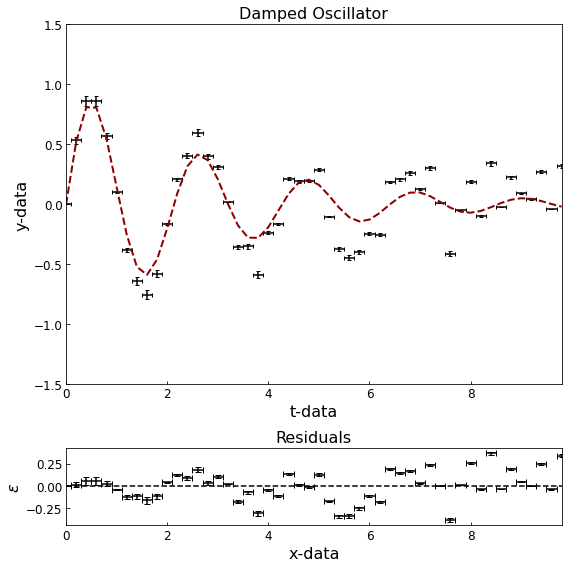

p1 =  0.17724 +- 0.00838
p2 =  2.99874 +- 0.01003


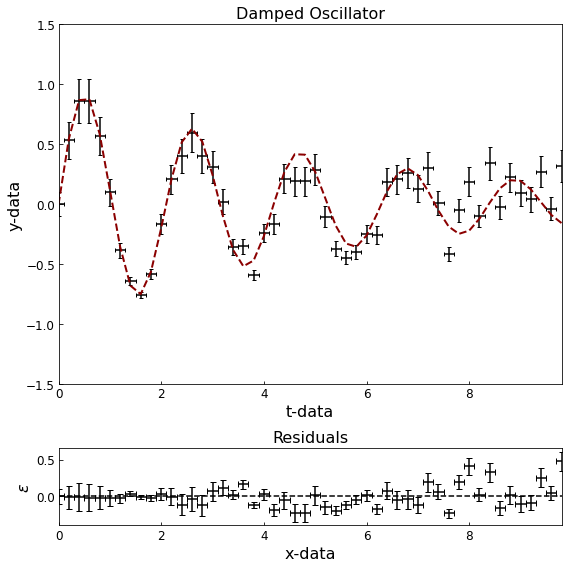

In [11]:
def model(t,a,b):
    return np.exp(-a*t)*np.sin(b*t)

def fit_result(t,y,xerr,yerr,model_name,p0):
    popt, pcov = curve_fit(model_name,t,y,sigma=yerr,absolute_sigma=True,p0=p0)
    for i in range(len(popt)):
        print('p{} = '.format(i+1), '{:.5f}'.format(popt[i]), '+-', '{:.5f}'.format(np.sqrt(pcov[i][i])))
        
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(4, 4)
    axes_main = plt.subplot(gs[0:3, :4])
    axes_residuals = plt.subplot(gs[3, :4],sharex=axes_main)

    axes_main.tick_params(axis='both',direction ='in',labelsize=12)
    axes_main.set_title('Damped Oscillator',fontsize=16)    
    axes_main.errorbar(t,y,xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=2)
    axes_main.plot(t,model(t,*popt),color='darkred',ls='--', lw=2)
    axes_main.set_xlabel('t-data',fontsize=16)
    axes_main.set_ylabel('y-data',fontsize=16)
    axes_main.set_xlim(np.min(t),np.max(t))
    axes_main.set_ylim(-1.5,1.5)

    axes_residuals.tick_params(axis='both',direction ='in',labelsize=12)
    axes_residuals.set_title('Residuals',fontsize=16)
    axes_residuals.errorbar(t,y-model(t,*popt),xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=3)
    axes_residuals.hlines(0,np.min(t),np.max(t),color='black',ls='--')
    axes_residuals.set_xlabel('x-data',fontsize=16)
    axes_residuals.set_ylabel(r'$\epsilon$',fontsize=16)
    axes_residuals.set_xlim(np.min(t),np.max(t))
    # axes_residuals.set_ylim(-0.5,0.5)
    plt.tight_layout()
    plt.show()
    return
fit_result(t,y,xerr,yerr,model,[-0.2,3])
fit_result(t,y,xerr,yerr2,model,[-0.2,3])

  


NameError: name 'popt' is not defined

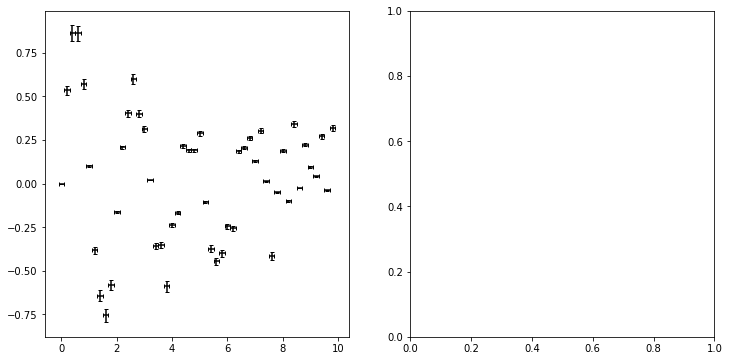

In [12]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(t,y,xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=2)
axes[0].plot(t,model(t,*popt),color='darkred',ls='--', lw=2)
axes[0].set_xlabel('t-data',fontsize=16)
axes[0].set_ylabel('y-data',fontsize=16)
axes[0].set_xlim(0,10)
axes[0].set_ylim(-1.5,1.5)

axes[1].errorbar(x,y-model(x,*popt),xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=3)
axes[1].hlines(0,0,10,color='black',ls='--')
axes[1].set_xlabel('t-data',fontsize=16)
axes[1].set_ylabel('y-data',fontsize=16)
axes[1].set_xlim(0,10)
axes[1].set_ylim(-0.5,0.5)

plt.tight_layout()
plt.show()

In [ ]:
# xtra